# K-Means Clustering without OpenCV

## 사용한 라이브러리
* 이미지 읽기, matplotlib.image
* 이미지 출력/그래프 출력, matplotlib.pyplot
* 행렬 계산, numpy 

In [22]:
import random

import numpy as np
import numpy.matlib
import matplotlib.image as pim
import matplotlib.pyplot as plt

## K-means 행렬(centroid) 초기화 함수

In [4]:
def init_centroids(X, K):
    c = random.sample(list(X), K)
    return c

## 거리 계산 함수

In [5]:
def closest_centroids(X, c):
    K = np.size(c, 0)
    idx = np.zeros((np.size(X, 0), 1))
    arr = np.empty((np.size(X, 0), 1))
    for i in range(0, K):
        y = c[i]
        temp = np.ones((np.size(X, 0), 1))*y
        b = np.power(np.subtract(X, temp), 2)
        a = np.sum(b, axis=1)
        a = np.asarray(a)
        a.resize((np.size(X, 0), 1))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr, 0, axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

## K 계산 함수

In [6]:
def compute_centroids(X, idx, K):
    n = np.size(X, 1)
    centroids = np.zeros((K, n))
    for i in range(0, K):
        ci = idx == i
        ci = ci.astype(int)
        total_number = sum(ci)
        ci.resize((np.size(X, 0), 1))
        total_matrix = np.matlib.repmat(ci, 1, n)
        ci = np.transpose(ci)
        total = np.multiply(X, total_matrix)
        centroids[i] = (1/total_number)*np.sum(total, axis=0)
    return centroids

## K-means 호출 함수

In [13]:
def run_kMean(X, initial_centroids, max_iters):
    m = np.size(X, 0)
    n = np.size(X, 1)
    K = np.size(initial_centroids, 0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))
    for i in range(1, max_iters):
        idx = closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

## 이미지 로드 및 값 세팅

In [14]:
imgPath = '../assets/3_9.jpg'
image = pim.imread(imgPath)
rows = image.shape[0]
cols = image.shape[1]
image = image / 255
X = image.reshape(image.shape[0] * image.shape[1], 3)

## k = 10

In [15]:
# k = 10
K = 10

max_iters = 2
initial_centroids = init_centroids(X, K)
centroids, idx = run_kMean(X, initial_centroids, max_iters)
idx = closest_centroids(X, centroids)
k10 = centroids[idx]
k10 = np.reshape(k10, (rows, cols, 3))

## k = 20

In [16]:
# k = 20
K = 20

max_iters = 2
initial_centroids = init_centroids(X, K)
centroids, idx = run_kMean(X, initial_centroids, max_iters)
idx = closest_centroids(X, centroids)
k20 = centroids[idx]
k20 = np.reshape(k20, (rows, cols, 3))

## k = 30

In [17]:
# k = 30
K = 30

max_iters = 2
initial_centroids = init_centroids(X, K)
centroids, idx = run_kMean(X, initial_centroids, max_iters)
idx = closest_centroids(X, centroids)
k30 = centroids[idx]
k30 = np.reshape(k30, (rows, cols, 3))

## 출력

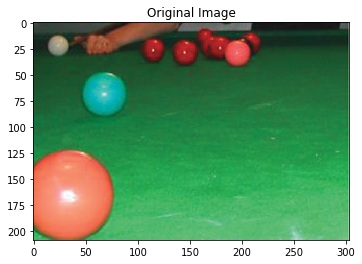

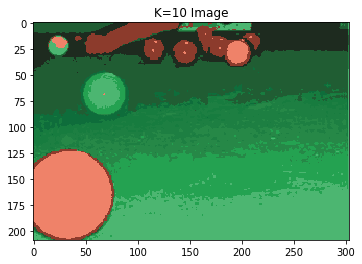

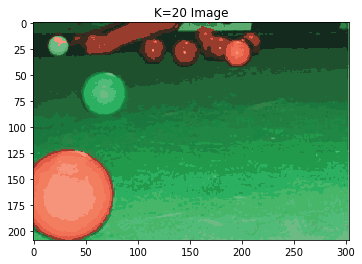

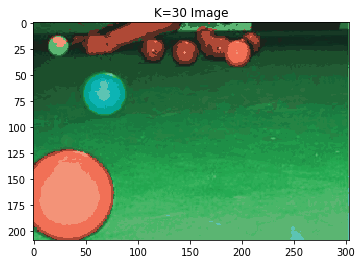

In [21]:
plt.imshow(image, 'gray'), plt.title('Original Image')
plt.show()
plt.imshow(k10, 'gray'), plt.title('K=10 Image')
plt.show()
plt.imshow(k20, 'gray'), plt.title('K=20 Image')
plt.show()
plt.imshow(k30, 'gray'), plt.title('K=30 Image')
plt.show()